# Team 6
### U1610016 Akmal Karimov
### U1610041 Azizbek Kobilov
### U1610052 Boburjon Bahodirov
### U1610061 Dilorom Alieva
### U1610072 Feruza Latipova
------------------------------
## Task
***To Remove backup beeper sound of a truck and extract animal sound as clearly as possible***

***

## Used libraries/environment
* Jupyter Notebook - Editor
* Python 3.7 - Language
* Numpy - Library to work with lists (vectors and etc.)
* Matplotlib - Graphing results
* Scipy.wav - to extract stream from .wav file
* Ipython.display - to play sound in editor

In [1]:
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from scipy.fftpack import ifft
from scipy import arange
import numpy as np
import IPython.display as ipd
from math import ceil
%matplotlib notebook

In [2]:
rate, data = wav.read('test.wav')

<IPython.core.display.Javascript object>


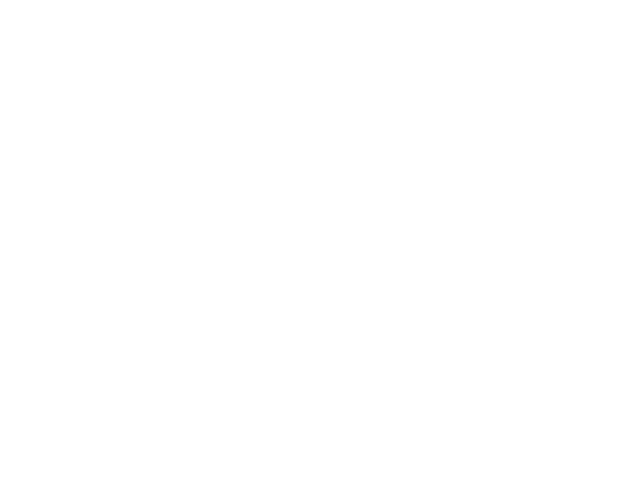

In [3]:
%matplotlib notebook
plt.plot(data)
plt.show()

In [4]:
if len(data) % 2 == 1:
    data = data[:-1]
    
ipd.Audio(data, rate=rate) # shows audio widget

In [5]:
def to2spow(x):
    new_arr = np.zeros(2 ** ceil(np.log2(len(x))))
    new_arr[:len(x)] += x
    return new_arr
    
def DFT(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)
    
def FFT(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    old_size = N
    
    if np.log2(N) % 1 > 0:
        x = to2spow(x)
        N = len(x)
    
    if N <= 16: return DFT(x)
    else:
        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])
        factor = np.exp(-2j * np.pi * np.arange(N) / N)
        return np.concatenate([X_even + factor[:N // 2] * X_odd, 
                               X_even + factor[N // 2:] * X_odd])[:old_size]

In [6]:
fft_out = FFT(data)

<IPython.core.display.Javascript object>


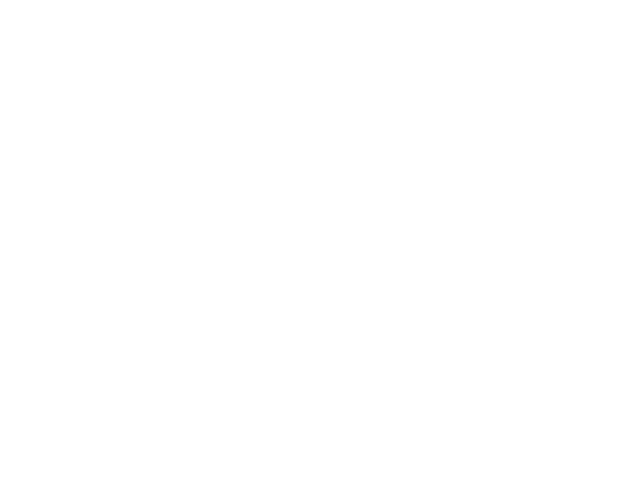

C:\Users\ThunderBird\Anaconda3\envs\tf\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [7]:
fft_out = fft_out[:len(fft_out) // 2]

full_fft = []
full_fft.extend(fft_out)
full_fft.extend(fft_out[::-1])
full_fft = np.array(full_fft)

%matplotlib notebook
plt.plot(full_fft)
plt.show()

In [8]:
length = len(full_fft)
var = rate / length
freqs = np.array([(i * var) for i in range(length)])

In [9]:
def index2frq(x, rate):
    x = x - np.average(x)
    n = len(x)
    k = arange(n)
    tarr = n / float(rate)
    frqarr = k / float(tarr)
    frqarr = frqarr[range(n // 2)]
    return frqarr

In [10]:
%matplotlib notebook

fft_half = full_fft[:len(full_fft) // 2]

x = index2frq(full_fft, rate)
# plt.plot(x, np.abs(fft_half))
# plt.show()

In [11]:
def band_pass(data):
    copy = data.copy()
    
    lower = np.where(freqs > 1000.0)[0][0]
    
    copy[lower:] = 0
    
    return copy

filtered_data = band_pass(full_fft)

<IPython.core.display.Javascript object>


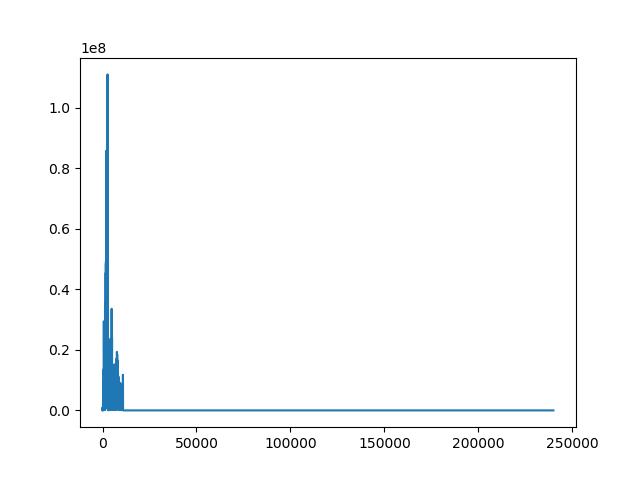

In [12]:
%matplotlib notebook
plt.plot(np.abs(filtered_data[:len(filtered_data) // 2]))
plt.show()

In [13]:
inv_fft = ifft(filtered_data)
ipd.Audio(inv_fft.real, rate=rate)

In [14]:
wav.write('processed.wav', rate, inv_fft.real)